# DBSCAN Clustering

Density-based Spatial Clustering of Applications with Noise (DBSCAN) assigns cluster labels based on dense regions of points.

In DBSCAN, the notion of density is defned as the number of points within a specifed radius ε .

According to the DBSCAN algorithm, a special label is assigned to each sample (point) using the following criteria:
* A point is considered a core point if at least a specified number (MinPts) of neighboring points fall within the specified radius ε
* A border point is a point that has fewer neighbors than MinPts within ε , but lies within the ε radius of a core point
* All other points that are neither core nor border points are considered noise points

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two simple steps:

1 Form a separate cluster for each core point or connected group of core points (core points are connected if they are no farther away than ε ).

2 Assign each border point to the cluster of its corresponding core point.

In [27]:
import pandas as pd
df=pd.read_csv('star.csv')
df.head(20)

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
5,-0.356017,-0.045705,0.335006,-0.709008,-0.649903,0.397949,0.000016,6
6,-0.397190,-1.401627,-0.757772,0.041345,0.718185,0.422623,0.000016,7
7,-0.916657,0.643472,-0.146350,-0.511860,0.220190,-0.529937,0.000016,8
8,2.241766,0.790756,0.290989,0.292099,0.053339,-0.472290,0.000016,9
9,-0.976209,0.445163,-0.705493,-0.120242,-0.231255,-0.227857,0.000016,10


In [5]:
df.shape

(64000, 8)

In [6]:
df.drop(labels=range(2000, 64000), axis=0,inplace=True)
df

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
...,...,...,...,...,...,...,...,...
1995,-0.228263,0.030902,0.637504,0.963517,0.052193,0.300143,0.000016,1996
1996,0.289267,-0.079845,-0.151375,-0.085585,-0.594473,0.118628,0.000016,1997
1997,-0.634847,-0.170583,0.305011,0.286061,-0.323921,-0.275013,0.000016,1998
1998,0.740059,0.054136,-0.237948,0.752442,-0.137735,-0.480584,0.000016,1999


In [15]:
x= df.iloc[:, [0,3]].values
x

array([[ 0.48593906,  0.46153894],
       [-0.06596069, -0.57578009],
       [-0.03480916, -0.55399138],
       ...,
       [-0.63484663,  0.28606132],
       [ 0.74005854,  0.75244206],
       [-0.16316329,  0.67486835]])

In [16]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [17]:
model=db.fit(x)
Y=model.labels_
n_clusters=len(set(Y))- (1 if -1 in Y else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


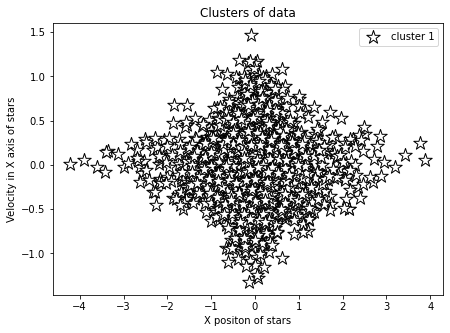

In [26]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 200, c='white',edgecolor='black', marker='*',label='cluster 1')

plt.xlabel('X positon of stars')
plt.ylabel('Velocity in X axis of stars')
plt.title('Clusters of data')
plt.legend()
plt.show()